In [1]:
import numpy as np
 
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

x = np.array([  [0,0,1],
                     [0,1,1],
                     [1,0,1],
                     [1,1,1] ])
print("x shape : ",x.shape)
        
y = np.array([[0,0,1,1]]).T
print("y shape : ",y.shape)

x shape :  (4, 3)
y shape :  (4, 1)


In [2]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
w1 = 2*np.random.random((3,3)) - 1
w2 = 2*np.random.random((3,1)) - 1
# print("w1 shape: ",w1.shape)
# print("w2 shape: ",w2.shape)

iter = 0
loss_history =[]
epoch = 1000
lr = 0.5


for iter in range(epoch):
    
    # forward propagation
    h0 = x
    h1 = nonlin(np.dot(h0,w1))
    h2 = nonlin(np.dot(h1,w2))
    
    #print("h1 shape: ",h1.shape)
    #print("h2 shape:",h2.shape)
    
    # calculate the gradient of w2 
    h2_error = ((y - h2)**2)/2  # MSE as my loss function
    h2_delta = (-1)*(y - h2) * nonlin( h2, True)
    
    #print("h2_error shape: ", h2_error.shape)
    #print("h2_delta shape: ", h2_delta.shape)
    # update weights
    w2 -= lr * ( np.dot(h1.T,h2_delta))
    
    
    # calculate the gradient of w1
    h1_delta = np.dot(h2_delta,w2.T)*nonlin(h1,True)
    #print("h1_delta shape: ",h1_delta.shape)
    # update weights
    w1  -= lr * np.dot(h0.T,h1_delta)
    
    # store the loss value every epoch
    error = np.mean(h2_error)
    loss_history.append(error)
    accuracy = (1-error)*100
    
    if (iter+1) % 50 == 0:
        print("Epoch: ", iter+1," Loss: ", error,"Accuracy: ", accuracy)
    
print("Output After Training:")
print(h2)

Epoch:  50  Loss:  0.11073624839094288 Accuracy:  88.9263751609057
Epoch:  100  Loss:  0.04582233124709296 Accuracy:  95.4177668752907
Epoch:  150  Loss:  0.013484958253695726 Accuracy:  98.65150417463042
Epoch:  200  Loss:  0.006360717111887715 Accuracy:  99.36392828881124
Epoch:  250  Loss:  0.0038874161181521242 Accuracy:  99.61125838818478
Epoch:  300  Loss:  0.0027187493170899753 Accuracy:  99.728125068291
Epoch:  350  Loss:  0.002058878980372342 Accuracy:  99.79411210196277
Epoch:  400  Loss:  0.0016419530556717155 Accuracy:  99.83580469443282
Epoch:  450  Loss:  0.0013575445196884134 Accuracy:  99.86424554803116
Epoch:  500  Loss:  0.001152499938694703 Accuracy:  99.88475000613053
Epoch:  550  Loss:  0.0009983809625567198 Accuracy:  99.90016190374433
Epoch:  600  Loss:  0.0008787156158665504 Accuracy:  99.91212843841335
Epoch:  650  Loss:  0.000783355760686811 Accuracy:  99.92166442393132
Epoch:  700  Loss:  0.0007057331784060357 Accuracy:  99.92942668215939
Epoch:  750  Loss:  

Text(0, 0.5, 'Loss')

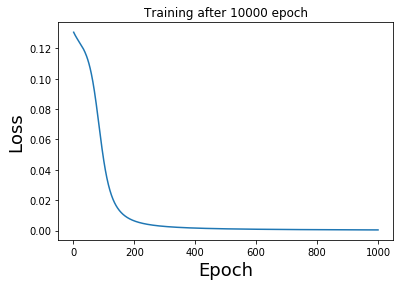

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

epoch = np.arange(1,1001,1)
plt.plot(epoch, loss_history)
plt.title("Training after 10000 epoch")
plt.xlabel("Epoch",fontsize = 18)
plt.ylabel("Loss",fontsize=18)